In [1]:
from starling_rhythm.mfdfa import tmf
from starling_rhythm.utils.paths import PROCESSED_DIR

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bID = 's_b1555_22'

In [3]:
real_DIR = PROCESSED_DIR / bID / 'templatingFalse-empiricalstrict'
real_wavs = list(real_DIR.glob('*.wav'))
fake_DIR = PROCESSED_DIR / bID / 'templatingTrue-transition_gap_profilesstrict'
fake_wavs = list(fake_DIR.glob('*.wav'))

In [4]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

In [5]:
n_jobs = 36
verbose = 0

In [6]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    real_ts = parallel(
        delayed(tmf)(
            address,
            amp_env_sr = 200,
            z = False
        )
        for address in tqdm(real_wavs, desc = 'real ones')
    )

real ones:   8%|▊         | 432/5148 [03:14<39:05,  2.01it/s]/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
real ones: 100%|██████████| 5148/5148 [1:11:43<00:00,  1.20it/s]


In [7]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    fake_ts = parallel(
        delayed(tmf)(
            address,
            amp_env_sr = 200,
            z = False
        )
        for address in tqdm(fake_wavs, desc = 'fake ones')
    )

fake ones: 100%|██████████| 5148/5148 [57:52<00:00,  1.48it/s]  


In [8]:
import pandas as pd
import numpy as np

In [9]:
real_df = pd.DataFrame(
    {
        'id': np.full(len(real_ts), 'real'),
        'ts': real_ts
    }
)
fake_df = pd.DataFrame(
    {
        'id': np.full(len(real_ts), 'fake'),
        'ts': fake_ts
    }
)

In [10]:
total_df = pd.concat([real_df, fake_df])

In [11]:
total_df = total_df.reset_index()

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='ts', ylabel='Count'>

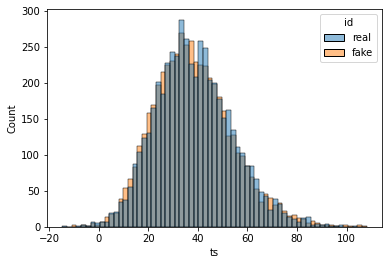

In [13]:
sns.histplot(data = total_df, x = "ts", hue = "id")

In [14]:
np.mean(real_ts)

38.533906612315036

In [15]:
np.mean(fake_ts)

38.046360267408694

In [16]:
import scipy.stats

In [17]:
scipy.stats.ttest_ind(real_ts, fake_ts)

Ttest_indResult(statistic=1.5797536418979936, pvalue=0.11419402041630963)